# Analysis of Greenhouse Gases in our Neighborhood (Ochsenkopf, Germany)

Abbreviations:
* OXK: Ochsenkopf, Germany
* CO₂: Carbon Dioxide
* CH₄: Methane

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

filepath_co2 = "data/carbonDioxide/co2_oxk_surface-flask_1_ccgg_month.txt"
filepath_ch4 = "data/methane/ch4_oxk_surface-flask_1_ccgg_month.txt"
column_names = ["site", "year", "month", "value"]

data_co2 = pd.read_csv(filepath_co2, sep=r'\s+', header=55, names=column_names)
data_ch4 = pd.read_csv(filepath_ch4, sep=r'\s+', header=55, names=column_names)

data_co2.head()

,site,year,month,value
0,OXK,2006,8,376.85
1,OXK,2006,9,377.57
2,OXK,2006,10,382.38
3,OXK,2006,11,388.65
4,OXK,2006,12,393.73


In [98]:
data_co2['date'] = pd.to_datetime(data_co2[['year', 'month']].assign(day=1))
data_co2['change'] = data_co2['value'].pct_change() * 100

data_ch4['date'] = pd.to_datetime(data_ch4[['year', 'month']].assign(day=1))
data_ch4['change'] = data_ch4['value'].pct_change() * 100

data_co2.head()

,site,year,month,value,date,change
0,OXK,2006,8,376.85,2006-08-01,NaN
1,OXK,2006,9,377.57,2006-09-01,0.191057
2,OXK,2006,10,382.38,2006-10-01,1.273936
3,OXK,2006,11,388.65,2006-11-01,1.639730
4,OXK,2006,12,393.73,2006-12-01,1.307089


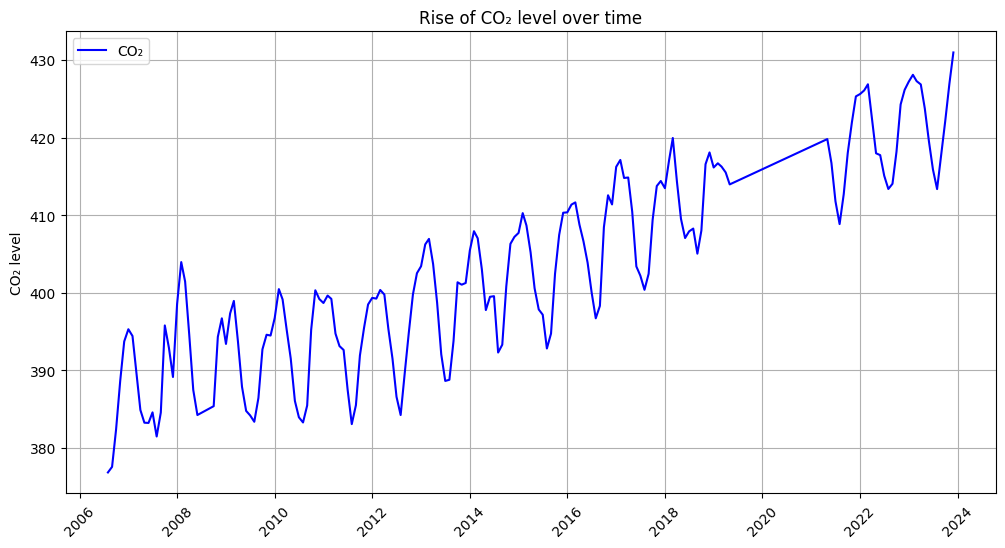

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(data_co2['date'], data_co2['value'], label='CO₂', color='blue')

plt.title('Rise of CO₂ level over time')
plt.ylabel('CO₂ level')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

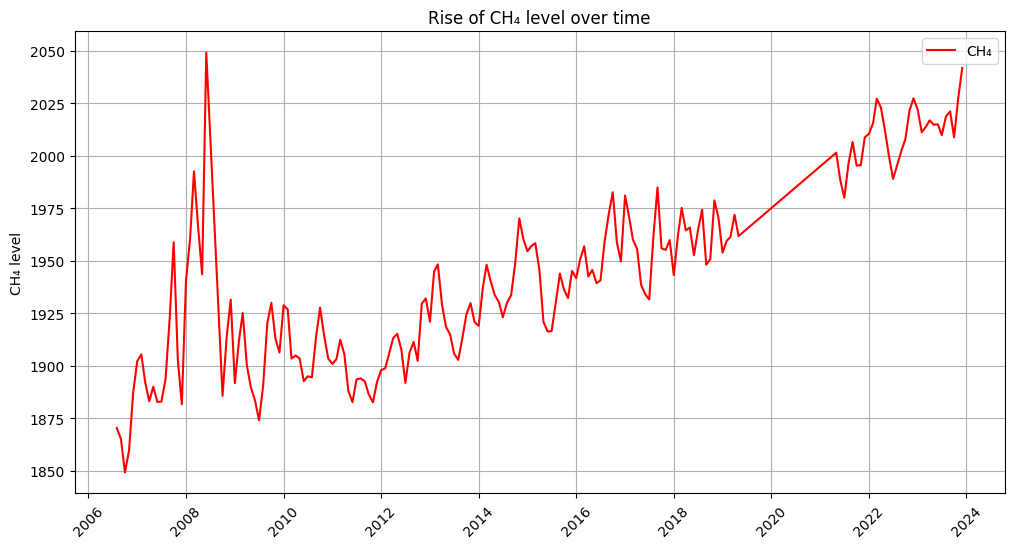

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(data_ch4['date'], data_ch4['value'], label='CH₄', color='red')

plt.title('Rise of CH₄ level over time')
plt.ylabel('CH₄ level')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [101]:
total_rise_co2 = data_co2['value'].iloc[-1] - data_co2['value'].iloc[0]
percent_rise_co2 = round((total_rise_co2/data_co2['value'].iloc[-1]) * 100, 2)
n_months_co2 = len(data_co2)
avg_year_co2 = round((percent_rise_co2 / n_months_co2) * 12, 2)

total_rise_ch4 = data_ch4['value'].iloc[-1] - data_ch4['value'].iloc[0]
percent_rise_ch4 = round((total_rise_ch4/data_ch4['value'].iloc[-1]) * 100, 2)
n_months_ch4 = len(data_ch4)
avg_year_ch4 = round((percent_rise_ch4 / n_months_ch4) * 12, 2)

print("Total rise of the CO₂ level over time [last - first value]: ", percent_rise_co2, "% in", n_months_co2, "months -> On average", avg_year_co2, "% per year")
print("Total rise of the CH₄ level over time [last - first value]: ", percent_rise_ch4, "% in", n_months_ch4, "months -> On average", avg_year_ch4, "% per year")

Total rise of the CO₂ level over time [last - first value]:  12.56 % in 183 months -> On average 0.82 % per year
Total rise of the CH₄ level over time [last - first value]:  8.4 % in 183 months -> On average 0.55 % per year


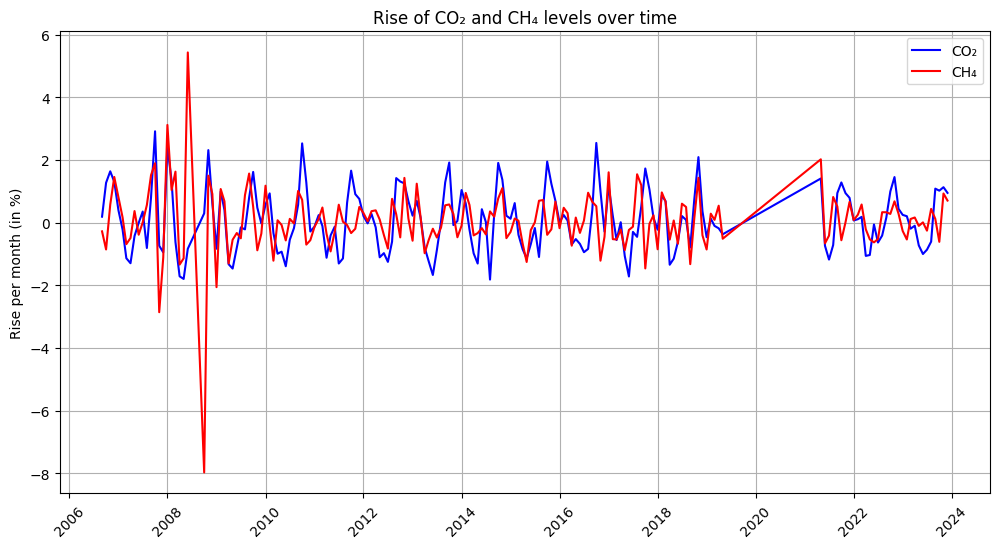

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(data_co2['date'], data_co2['change'], label='CO₂', color='blue')
plt.plot(data_ch4['date'], data_ch4['change'], label='CH₄', color='red')

plt.title('Rise of CO₂ and CH₄ levels over time')
plt.ylabel('Rise per month (in %)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

## Restrict to 12 months

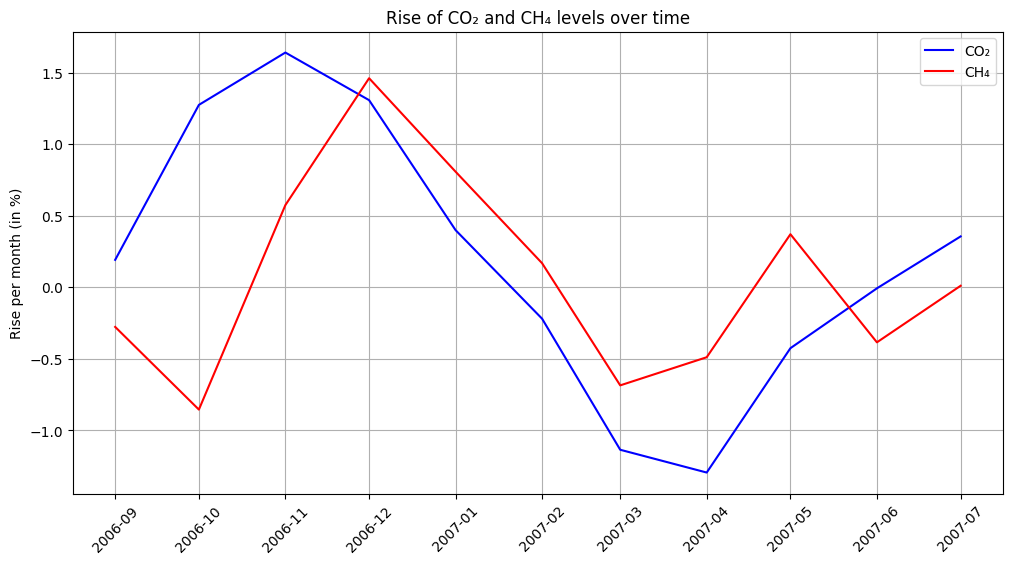

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(data_co2['date'][:12], data_co2['change'][:12], label='CO₂', color='blue')
plt.plot(data_ch4['date'][:12], data_ch4['change'][:12], label='CH₄', color='red')

plt.title('Rise of CO₂ and CH₄ levels over time')
plt.ylabel('Rise per month (in %)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Aggregate months to show average per month

In [104]:
monthly_avg_co2 = data_co2.groupby('month')['value'].mean().reset_index()
monthly_avg_co2['change'] = monthly_avg_co2['value'].pct_change() * 100

monthly_avg_ch4 = data_ch4.groupby('month')['value'].mean().reset_index()
monthly_avg_ch4['change'] = monthly_avg_ch4['value'].pct_change() * 100

monthly_avg_co2

,month,value,change
0,1,407.174667,NaN
1,2,409.057333,0.462373
2,3,408.562000,-0.121091
3,4,405.157333,-0.833329
4,5,402.361875,-0.689969
5,6,398.673333,-0.916722
6,7,397.510714,-0.291622
7,8,393.812000,-0.930469
8,9,396.103333,0.581834
9,10,401.690625,1.410564


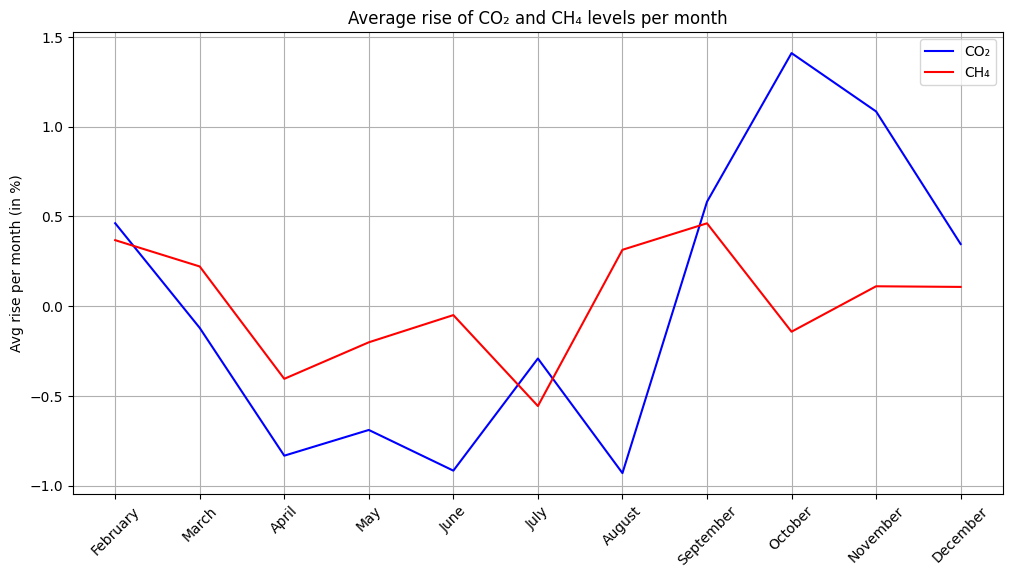

In [106]:
plt.figure(figsize=(12, 6))

months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

monthly_avg_co2['month_str'] = monthly_avg_co2['month'].apply(lambda x: months[x - 1])
monthly_avg_ch4['month_str'] = monthly_avg_ch4['month'].apply(lambda x: months[x - 1])

plt.plot(monthly_avg_co2['month_str'], monthly_avg_co2['change'], label='CO₂', color='blue')
plt.plot(monthly_avg_ch4['month_str'], monthly_avg_ch4['change'], label='CH₄', color='red')

plt.title('Average rise of CO₂ and CH₄ levels per month')
plt.ylabel('Avg rise per month (in %)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()